# Ch.5 Exploring numerical data

This notebook contains my work done on the exercises and applications Ch.5 Exploring numerical data of the [Introduction to Modern Statistics Book](https://openintro-ims.netlify.app/index.html).

In [31]:
import pandas as pd
import numpy as np

from pandas.api.types import CategoricalDtype

from collections import defaultdict, Counter

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
import matplotlib.dates as mdates

import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf

import datastats.singlevar as dssv
import datastats.multivar as dsmv
import datastats.hypotest as dsht
import datastats.plotting as dsplt

In [32]:
dsplt.SetParams()

In [33]:
# Read in the two datasets that are used in this chapter
df_loan50 = pd.read_csv('datasets/loan50.csv')
df_county = pd.read_csv('datasets/county.csv')

In [34]:
df_loan50.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   state                    50 non-null     object 
 1   emp_length               48 non-null     float64
 2   term                     50 non-null     int64  
 3   homeownership            50 non-null     object 
 4   annual_income            50 non-null     int64  
 5   verified_income          50 non-null     object 
 6   debt_to_income           50 non-null     float64
 7   total_credit_limit       50 non-null     int64  
 8   total_credit_utilized    50 non-null     int64  
 9   num_cc_carrying_balance  50 non-null     int64  
 10  loan_purpose             50 non-null     object 
 11  loan_amount              50 non-null     int64  
 12  grade                    50 non-null     object 
 13  interest_rate            50 non-null     float64
 14  public_record_bankrupt   50 

In [35]:
df_county.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               3142 non-null   object 
 1   state              3142 non-null   object 
 2   pop2000            3139 non-null   float64
 3   pop2010            3142 non-null   int64  
 4   pop2017            3139 non-null   float64
 5   pop_change         3139 non-null   float64
 6   poverty            3140 non-null   float64
 7   homeownership      3142 non-null   float64
 8   multi_unit         3142 non-null   float64
 9   unemployment_rate  3139 non-null   float64
 10  metro              3139 non-null   object 
 11  median_edu         3140 non-null   object 
 12  per_capita_income  3140 non-null   float64
 13  median_hh_income   3140 non-null   float64
 14  smoking_ban        2562 non-null   object 
dtypes: float64(9), int64(1), object(5)
memory usage: 368.3+ KB


### Scatterplots

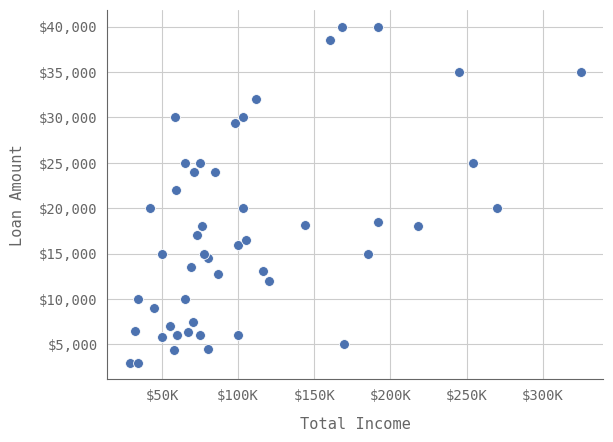

In [36]:
g = sns.scatterplot(x='total_income', y='loan_amount', data=df_loan50, s=50)

g.set_xlabel('Total Income', labelpad=10)
g.set_ylabel('Loan Amount', labelpad=10)

g.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p : '${:,.0f}K'.format(int(x//1000))))
g.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p : '${:,.0f}'.format(int(x))))

sns.despine()

plt.show()

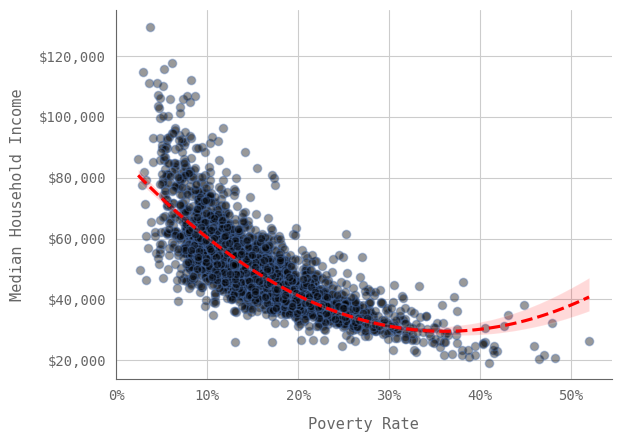

In [37]:
g = sns.regplot(x='poverty', y='median_hh_income', data=df_county, order=2, 
                line_kws = {'color':'r', 'linestyle':'--'}, scatter_kws = {'color':'k', 'alpha':.4, 'edgecolor':'C0'})

g.set_xlabel('Poverty Rate', labelpad=10)
g.set_ylabel('Median Household Income', labelpad=10)

g.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p : '{}%'.format(int(x))))
g.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p : '${:,.0f}'.format(int(x))))

sns.despine()

plt.show()

### Dot plot

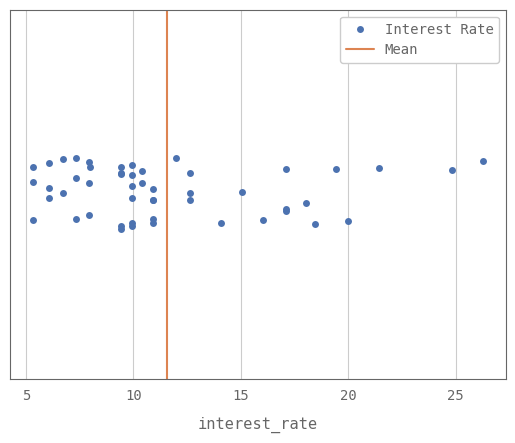

In [38]:
# The closest to a dotplot in seaborn is the stripplot and it's just as good for the purpose

g = sns.stripplot(x='interest_rate', data=df_loan50, label='Interest Rate')

mean_interest_rate = df_loan50.interest_rate.mean()

g.axvline(mean_interest_rate, color='C1', label='Mean')

plt.legend(framealpha=1)

### Histograms

In [39]:
# Bin the interest_rate data in loan50
# Can add .plot(kind='bar') to the end of the code below to turn the table into a plot
bins=[5,7.5,10,12.5,15,17.5,20,22.5,25,27.5]

pd.cut(x=df_loan50.interest_rate, 
       bins=bins).value_counts(sort=False)

(5.0, 7.5]      11
(7.5, 10.0]     15
(10.0, 12.5]     8
(12.5, 15.0]     4
(15.0, 17.5]     5
(17.5, 20.0]     4
(20.0, 22.5]     1
(22.5, 25.0]     1
(25.0, 27.5]     1
Name: interest_rate, dtype: int64

<AxesSubplot: xlabel='interest_rate', ylabel='Count'>

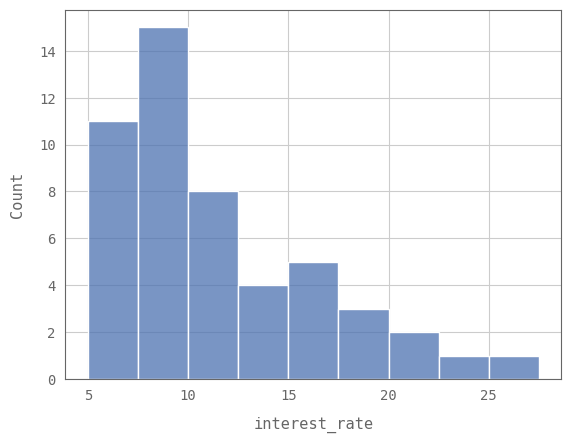

In [40]:
sns.histplot(data=df_loan50, x='interest_rate', bins=bins)

<AxesSubplot: xlabel='interest_rate', ylabel='Density'>

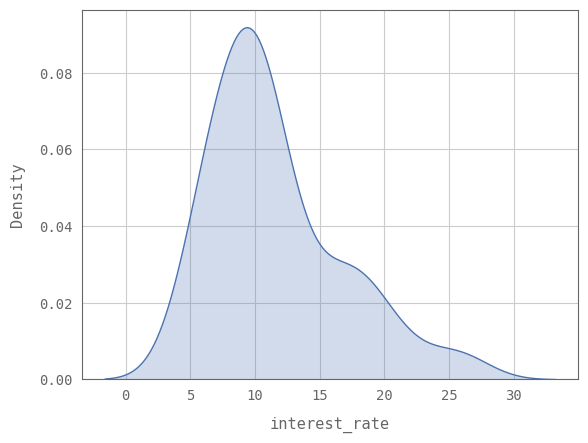

In [41]:
sns.kdeplot(data=df_loan50, x='interest_rate', fill='C0')

In [42]:
# Calculate the standard deviation and the mean
ir_std = df_loan50.interest_rate.std()
ir_mean = df_loan50.interest_rate.mean()
ir_std, ir_mean

(5.052114950136007, 11.5672)

<AxesSubplot: xlabel='interest_rate', ylabel='Count'>

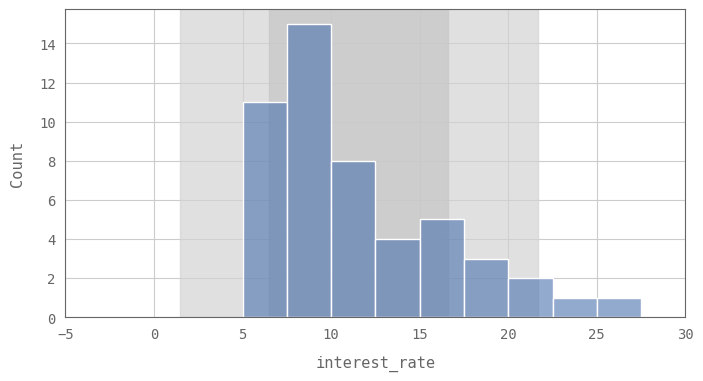

In [43]:
# Histogram with a CI added to show the standard deviations

fig,ax = plt.subplots()
fig.set_size_inches(8,4)

ax.set_xlim(-5,30)

ax.axvspan(ir_mean - ir_std, ir_mean + ir_std, color='darkgrey', alpha=.7)
ax.axvspan(ir_mean - 2*ir_std, ir_mean + 2*ir_std, color='lightgrey', alpha=.7)

sns.histplot(data=df_loan50, x='interest_rate', bins=bins, ax=ax, alpha=.6)

### Boxplot

<AxesSubplot: >

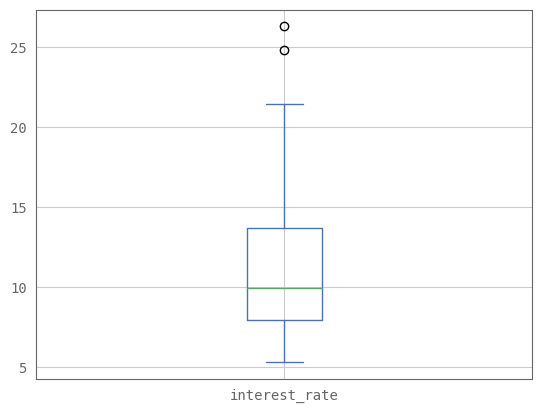

In [44]:
df_loan50.interest_rate.plot(kind='box')

### Transforming data

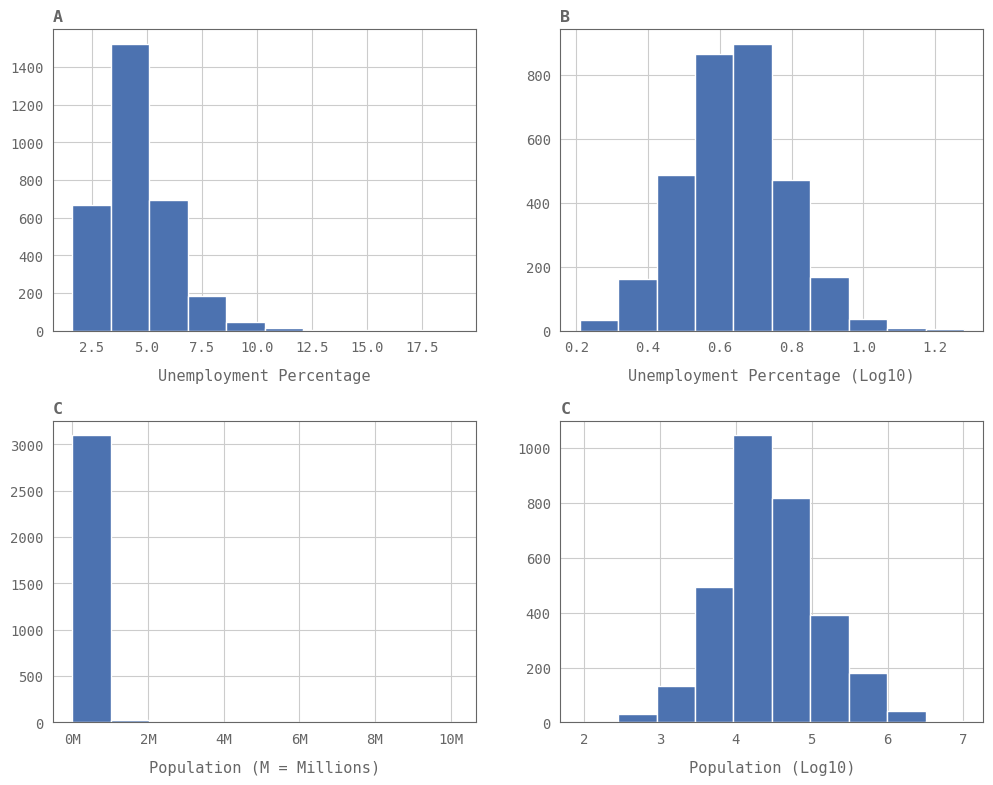

In [45]:
# Set up figure 
fig,axes = plt.subplots(ncols=2, nrows=2)
fig.set_size_inches(12,9)

# Plot A - Unemployment Percentage
axes[0,0].hist(x=df_county.unemployment_rate)
axes[0,0].set_title('A', loc='left')
axes[0,0].set_xlabel('Unemployment Percentage')

# Plot B - Unemployment Percentage - Log10
unemployment_rate_log10 = np.log10(df_county.unemployment_rate)

axes[0,1].hist(x=unemployment_rate_log10)
axes[0,1].set_title('B', loc='left')
axes[0,1].set_xlabel('Unemployment Percentage (Log10)')

# Plot C - Population
axes[1,0].hist(x=df_county.pop2017)
axes[1,0].set_title('C', loc='left')
axes[1,0].set_xlabel('Population (M = Millions)')
axes[1,0].get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p : '{}M'.format(int(x/1000000))))

# Plot C - Population - Log10
population_log10 = np.log10(df_county.pop2017)

axes[1,1].hist(x=population_log10)
axes[1,1].set_title('C', loc='left')
axes[1,1].set_xlabel('Population (Log10)')

plt.subplots_adjust(hspace=0.3)

plt.show()

To understand what the log10 transformation is showing think of it this way:
- The values on the x-axis are the exponents for base 10 that give you the original number.
- So in chart D, the 2 means 10 to the 2, which is 100, so 2 represents populations in the hundreds, 3 represents populations in the thousands, 4 represents populations in the ten thousands, etc.
- You can see how this works by looking at the values themselves in the series below.

In [46]:
df_county.pop2017.dropna().sort_values()

548           88.0
2673         134.0
2657         296.0
2653         417.0
1656         457.0
           ...    
222      3337685.0
103      4307033.0
2623     4652980.0
610      5211263.0
204     10163507.0
Name: pop2017, Length: 3139, dtype: float64

In [47]:
np.log10(df_county.pop2017.dropna().sort_values())

548     1.944483
2673    2.127105
2657    2.471292
2653    2.620136
1656    2.659916
          ...   
222     6.523445
103     6.634178
2623    6.667731
610     6.716943
204     7.007044
Name: pop2017, Length: 3139, dtype: float64

### Transformations - scatterplot

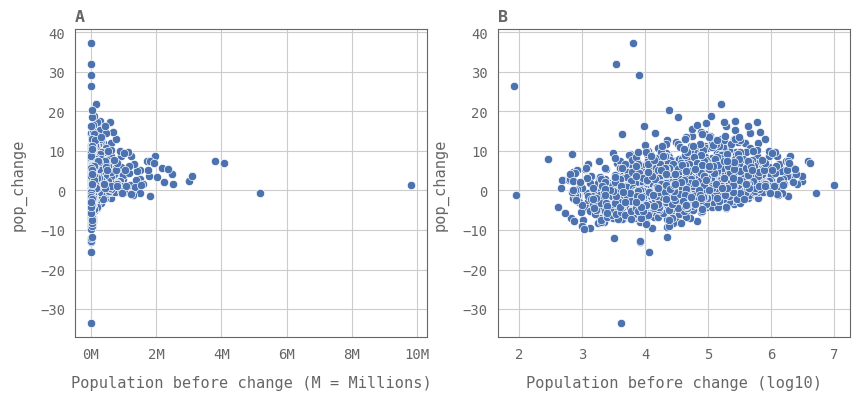

In [48]:
# Set up figure 
fig,axes = plt.subplots(ncols=2, nrows=1)
fig.set_size_inches(10,4)

# Plot A - population in 2010 vs population change up to 2017
sns.scatterplot(x='pop2010', y='pop_change', data=df_county, ax=axes[0])
axes[0].set_title('A', loc='left')
axes[0].set_xlabel('Population before change (M = Millions)')
axes[0].get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p : '{}M'.format(int(x/1000000))))

# Plot B - population in 2010 (log10) vs population change up to 2017
pop2010_log10 = np.log10(df_county.pop2010)
                         
sns.scatterplot(x=pop2010_log10, y='pop_change', data=df_county, ax=axes[1])
axes[1].set_title('B', loc='left')
axes[1].set_xlabel('Population before change (log10)')


plt.show()

The above answers an interesting question: does the size of initial population influence the increase in population change?  
And it appears that there is a positive association here, but it's quite small.  
Try using my datastats functions to determine whether or not this relationship is statistically significant. 

In [49]:
df_county.dropna(subset=['pop2010', 'pop_change'], inplace=True)
pop2010_log10_na_dropped = np.log10(df_county.pop2010)

regress_results = stats.linregress(pop2010_log10_na_dropped, df_county.pop_change)
print('intercept:', regress_results.intercept, 'slope:',regress_results.slope)

intercept: -9.698559463724898 slope: 2.294285877570051


In [50]:
fit_xs, fit_ys = dsmv.FitLine(pop2010_log10_na_dropped, regress_results.intercept, regress_results.slope)

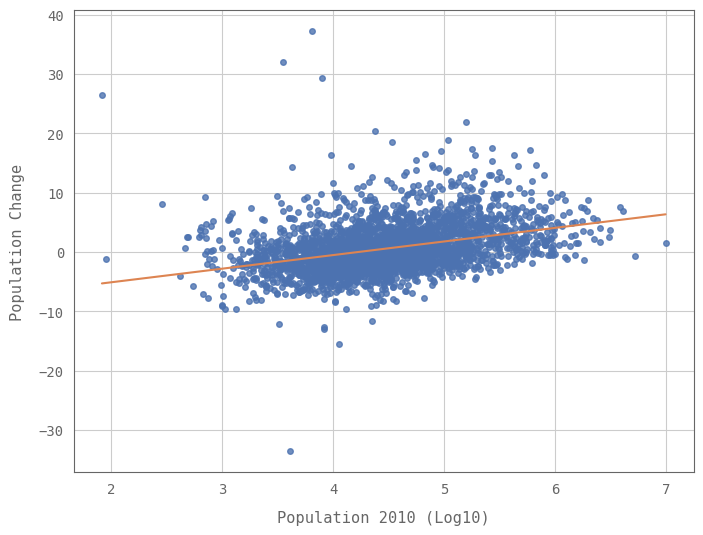

In [51]:
# Plot to show the fitline
fig,ax = plt.subplots()
fig.set_size_inches(8,6)

ax.scatter(pop2010_log10_na_dropped, df_county.pop_change, color='C0', s=16, alpha=0.8)
ax.plot(fit_xs, fit_ys, color='C1')

ax.set_xlabel('Population 2010 (Log10)')
ax.set_ylabel('Population Change')

plt.show()

In [52]:
inters, slopes, fit_ys_list = dsmv.ResampleInterSlope(pop2010_log10_na_dropped, df_county.pop_change)

In [53]:
# Use a test statistic of zero to represent no relationship
print('{:.3f}'.format(dssv.PValueFromEstimates(slopes, test_statistic=0, tail='left')))

0.000


The above gives a very small p-value (essentially zero), which indicates that the relationship is not due to chance.

In [54]:
slopes_rv = dssv.DiscreteRv(slopes)

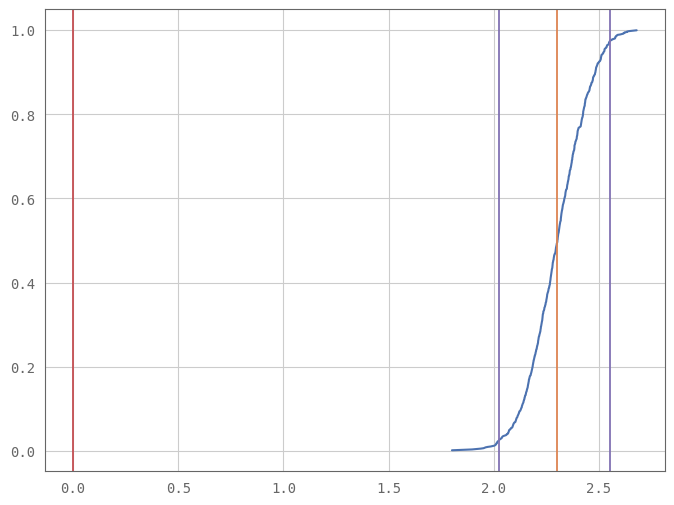

In [55]:
fig,ax = plt.subplots()
fig.set_size_inches(8,6)

ax.plot(slopes_rv.xk, slopes_rv.cdf(slopes_rv.xk))
ax.axvline(slopes_rv.mean(), color='C1', lw=1.3) # mean, orange line
ax.axvline(slopes_rv.interval(0.95)[0], color='C4', lw=1.3, label='CI') # CI lower, purple line
ax.axvline(slopes_rv.interval(0.95)[1], color='C4', lw=1.3) # CI upper, purple line

# Test statistic at zero representing no relationship, red line
ax.axvline(0, color='C3', lw=1.3)

plt.show()

The above shows visually that the relationship is not due to chance.

Try also using correlation hypothesis test

In [56]:
correlation_ht = dsht.HTCorrelationH0([pop2010_log10_na_dropped, df_county.pop_change])

In [57]:
correlation_ht.PValue()

0.0

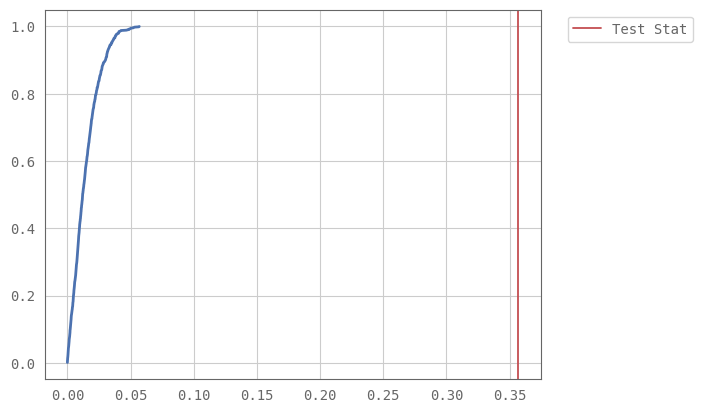

In [58]:
correlation_ht.PlotCdf()

The correlation hypothesis test also shows that the relationship is not due to chance.

### Mapping data

In [59]:
import geopandas as gpd

In [60]:
us_counties_map_df = gpd.read_file('datasets/USA_Counties_(Generalized).shp')
us_counties_map_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 61 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   FID         3142 non-null   int64   
 1   OBJECTID    3142 non-null   int64   
 2   NAME        3142 non-null   object  
 3   STATE_NAME  3142 non-null   object  
 4   STATE_FIPS  3142 non-null   object  
 5   CNTY_FIPS   3142 non-null   object  
 6   FIPS        3142 non-null   object  
 7   POPULATION  3142 non-null   int64   
 8   POP_SQMI    3142 non-null   float64 
 9   POP2010     3142 non-null   int64   
 10  POP10_SQMI  3142 non-null   float64 
 11  WHITE       3142 non-null   int64   
 12  BLACK       3142 non-null   int64   
 13  AMERI_ES    3142 non-null   int64   
 14  ASIAN       3142 non-null   int64   
 15  HAWN_PI     3142 non-null   int64   
 16  HISPANIC    3142 non-null   int64   
 17  OTHER       3142 non-null   int64   
 18  MULT_RACE   3142 non-null   int64   
 19

In [61]:
us_counties_map_df.index

RangeIndex(start=0, stop=3142, step=1)

In [62]:
# Drop Alaska and Hawaii to leave just contiguous US
us_counties_map_df = us_counties_map_df[~us_counties_map_df['STATE_NAME'].isin(['Alaska', 'Hawaii'])]

In [63]:
# Need to rename some columns to match them between the dataframes
# These two columns will be used for the merge because there are multiple counties with the same name in different states
df_county.rename(columns={'name':'NAME'}, inplace=True)
df_county.rename(columns={'state':'STATE_NAME'}, inplace=True)

In [64]:
# Drop everything except the shape info and the name and state in the map_df
us_counties_map_df = us_counties_map_df[['NAME', 'STATE_NAME', 'Shape_Leng', 'Shape_Area', 'Shape__Len', 'GlobalID', 'geometry']]
us_counties_map_df

NAME    STATE_NAME  Shape_Leng  Shape_Area     Shape__Len  \
1              Traill  North Dakota    2.150449    0.266362  283774.464607   
2               Walsh  North Dakota    3.379906    0.411900  411795.184706   
4                Ward  North Dakota    4.408571    0.640877  596478.705924   
6               Wells  North Dakota    2.664809    0.403544  353015.193234   
8            Williams  North Dakota    3.896127    0.682762  519301.933916   
...               ...           ...         ...         ...            ...   
3137          Harford      Maryland    1.385012    0.119719  172959.235812   
3138           Howard      Maryland    1.237328    0.065860  150014.867489   
3139             Kent      Maryland    1.346338    0.065516  165714.359266   
3140       Montgomery      Maryland    1.693809    0.134695  208993.038537   
3141  Prince George's      Maryland    1.925545    0.134094  247406.653670   

                                  GlobalID  \
1     6d3199a6-fe70-4984-aceb-a7eceb1879a6   
2     38365f59-6424-4cc8-876b-37efa76014c2   
4     8e55210b-0dad-4479-afb6-5367bd3170a0   
6     71fff712-0f6d-4bc0-8c53-2b859a57e571   
8     e624d668-86f5-454e-8ce8-ff7ea48c4709   
...                                    ...   
3137  62d9328d-910b-4573-a6e6-4335be263f9b   
3138  d15eada2-dfb7-4066-b434-36dfe718c676   
3139  50283643-7552-4310-b18b-2e93c519e260   
3140  17c25729-dcb2-4a37-a375-a0af47e0b289   
3141  798d0e71-68e7-49e9-abf4-2af3ec4714f8   

                                               geometry  
1     POLYGON ((-96.83707 47.24046, -97.45339 47.244...  
2     POLYGON ((-97.90248 48.19601, -98.29524 48.196...  
4     POLYGON ((-100.96471 47.85409, -101.87778 47.8...  
6     POLYGON ((-99.48504 47.32991, -100.03833 47.32...  
8     POLYGON ((-102.82546 48.12738, -102.85777 48.1...  
...                                                 ...  
3137  POLYGON ((-76.36371 39.39339, -76.40024 39.469...  
3138  POLYGON ((-76.84341 39.09826, -76.85935 39.105...  
3139  POLYGON ((-76.11095 39.11871, -76.22145 39.093...  
3140  POLYGON ((-77.00793 38.96667, -77.04209 38.993...  
3141  POLYGON ((-77.04515 38.78823, -76.91090 38.890...  

[3108 rows x 7 columns]

<AxesSubplot: >

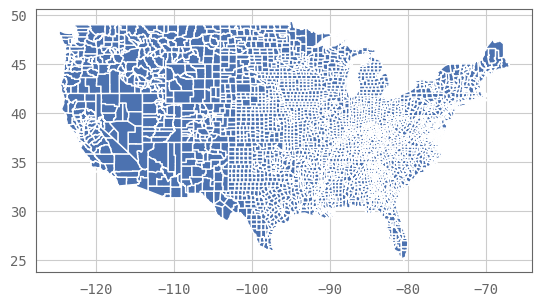

In [65]:
# Try an empty plot of the map
us_counties_map_df.plot()

In [66]:
# Need to remove the word 'county' from all county names in the df_county
df_county['NAME'] = df_county['NAME'].str.replace(' County', '')
df_county['NAME'] = df_county['NAME'].str.replace(' Parish', '')

In [67]:
df_county

NAME STATE_NAME   pop2000  pop2010   pop2017  pop_change  poverty  \
0        Autauga    Alabama   43671.0    54571   55504.0        1.48     13.7   
1        Baldwin    Alabama  140415.0   182265  212628.0        9.19     11.8   
2        Barbour    Alabama   29038.0    27457   25270.0       -6.22     27.2   
3           Bibb    Alabama   20826.0    22915   22668.0        0.73     15.2   
4         Blount    Alabama   51024.0    57322   58013.0        0.68     15.6   
...          ...        ...       ...      ...       ...         ...      ...   
3137  Sweetwater    Wyoming   37613.0    43806   43534.0       -3.57     12.0   
3138       Teton    Wyoming   18251.0    21294   23265.0        4.21      6.8   
3139       Uinta    Wyoming   19742.0    21118   20495.0       -2.22     14.9   
3140    Washakie    Wyoming    8289.0     8533    8064.0       -4.31     12.8   
3141      Weston    Wyoming    6644.0     7208    6927.0       -2.93     14.4   

      homeownership  multi_unit  unemployment_rate metro    median_edu  \
0              77.5         7.2               3.86   yes  some_college   
1              76.7        22.6               3.99   yes  some_college   
2              68.0        11.1               5.90    no    hs_diploma   
3              82.9         6.6               4.39   yes    hs_diploma   
4              82.0         3.7               4.02   yes    hs_diploma   
...             ...         ...                ...   ...           ...   
3137           73.7        14.6               4.55    no  some_college   
3138           60.8        31.9               2.99    no     bachelors   
3139           73.7        17.0               4.50    no  some_college   
3140           70.9        10.0               4.08    no  some_college   
3141           77.9         6.5               3.98    no  some_college   

      per_capita_income  median_hh_income smoking_ban  
0              27841.70           55317.0        none  
1              27779.85           52562.0        none  
2              17891.73           33368.0     partial  
3              20572.05           43404.0        none  
4              21367.39           47412.0        none  
...                 ...               ...         ...  
3137           30282.59           71083.0        none  
3138           48557.37           80049.0     partial  
3139           27048.12           54672.0        none  
3140           27494.83           51362.0        none  
3141           33296.70           59605.0        none  

[3139 rows x 15 columns]

In [68]:
merged_df = pd.merge(us_counties_map_df, df_county, how='left', on=['STATE_NAME', 'NAME'])
merged_df

NAME    STATE_NAME  Shape_Leng  Shape_Area     Shape__Len  \
0              Traill  North Dakota    2.150449    0.266362  283774.464607   
1               Walsh  North Dakota    3.379906    0.411900  411795.184706   
2                Ward  North Dakota    4.408571    0.640877  596478.705924   
3               Wells  North Dakota    2.664809    0.403544  353015.193234   
4            Williams  North Dakota    3.896127    0.682762  519301.933916   
...               ...           ...         ...         ...            ...   
3103          Harford      Maryland    1.385012    0.119719  172959.235812   
3104           Howard      Maryland    1.237328    0.065860  150014.867489   
3105             Kent      Maryland    1.346338    0.065516  165714.359266   
3106       Montgomery      Maryland    1.693809    0.134695  208993.038537   
3107  Prince George's      Maryland    1.925545    0.134094  247406.653670   

                                  GlobalID  \
0     6d3199a6-fe70-4984-aceb-a7eceb1879a6   
1     38365f59-6424-4cc8-876b-37efa76014c2   
2     8e55210b-0dad-4479-afb6-5367bd3170a0   
3     71fff712-0f6d-4bc0-8c53-2b859a57e571   
4     e624d668-86f5-454e-8ce8-ff7ea48c4709   
...                                    ...   
3103  62d9328d-910b-4573-a6e6-4335be263f9b   
3104  d15eada2-dfb7-4066-b434-36dfe718c676   
3105  50283643-7552-4310-b18b-2e93c519e260   
3106  17c25729-dcb2-4a37-a375-a0af47e0b289   
3107  798d0e71-68e7-49e9-abf4-2af3ec4714f8   

                                               geometry   pop2000   pop2010  \
0     POLYGON ((-96.83707 47.24046, -97.45339 47.244...    8477.0    8121.0   
1     POLYGON ((-97.90248 48.19601, -98.29524 48.196...   12389.0   11119.0   
2     POLYGON ((-100.96471 47.85409, -101.87778 47.8...   58795.0   61675.0   
3     POLYGON ((-99.48504 47.32991, -100.03833 47.32...    5102.0    4207.0   
4     POLYGON ((-102.82546 48.12738, -102.85777 48.1...   19761.0   22398.0   
...                                                 ...       ...       ...   
3103  POLYGON ((-76.36371 39.39339, -76.40024 39.469...  218590.0  244826.0   
3104  POLYGON ((-76.84341 39.09826, -76.85935 39.105...  247842.0  287085.0   
3105  POLYGON ((-76.11095 39.11871, -76.22145 39.093...   19197.0   20197.0   
3106  POLYGON ((-77.00793 38.96667, -77.04209 38.993...  873341.0  971777.0   
3107  POLYGON ((-77.04515 38.78823, -76.91090 38.890...  801515.0  863420.0   

        pop2017  pop_change  poverty  homeownership  multi_unit  \
0        8013.0       -2.10      6.9           75.0        17.3   
1       10855.0       -2.07      9.9           74.2        15.2   
2       68946.0        1.41      8.4           64.4        25.1   
3        4022.0       -3.06      5.8           76.1         9.8   
4       33349.0       12.67      9.0           71.2        18.7   
...         ...         ...      ...            ...         ...   
3103   252160.0        1.28      7.5           81.6        15.9   
3104   321113.0        5.56      5.2           74.7        24.8   
3105    19384.0       -2.21     13.1           71.8        12.6   
3106  1058810.0        3.88      7.0           69.3        32.5   
3107   912756.0        2.33      9.3           64.3        32.9   

      unemployment_rate metro    median_edu  per_capita_income  \
0                  2.41    no  some_college           33178.17   
1                  3.29    no  some_college           31495.39   
2                  3.22    no  some_college           33727.05   
3                  3.21    no  some_college           35474.13   
4                  2.51    no  some_college           45974.00   
...                 ...   ...           ...                ...   
3103               3.89   yes  some_college           37680.90   
3104               3.14   yes     bachelors           50492.11   
3105               4.48    no  some_college           32978.90   
3106               3.28   yes     bachelors           50229.75   
3107               4.16   yes  some_college    

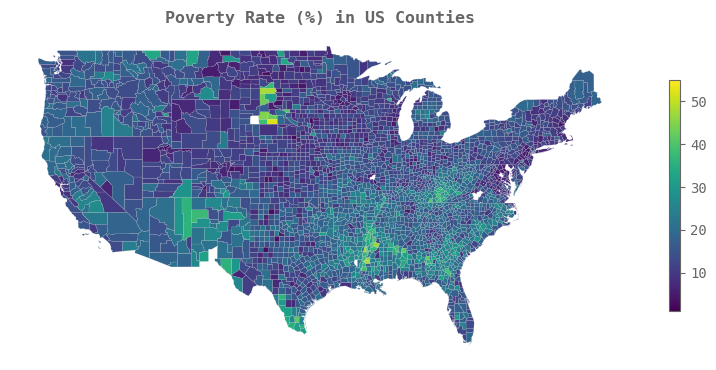

In [69]:
# Map the data for poverty

# Set the variable that will be plotted
variable = 'poverty'

# Create the figure and axes
fig,ax = plt.subplots()
fig.set_size_inches(10,6)

# Create the map
merged_df.plot(column=variable, cmap='viridis', vmin=1, vmax=55, linewidth=0.1, edgecolor='0.8', ax=ax, 
               legend=True, legend_kwds={"shrink":.5})

ax.axis('off')
ax.set_title('Poverty Rate (%) in US Counties')

plt.show()

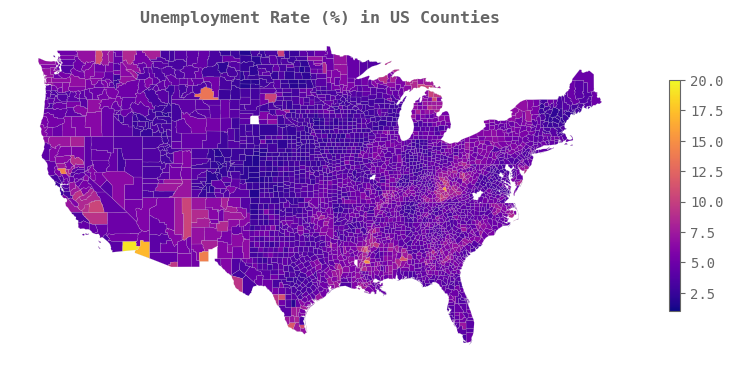

In [70]:
# Map the data for unemployment rate

# Set the variable that will be plotted
variable = 'unemployment_rate'

# Create the figure and axes
fig,ax = plt.subplots()
fig.set_size_inches(10,6)

# Create the map
merged_df.plot(column=variable, cmap='plasma', vmin=1, vmax=20, linewidth=0.1, edgecolor='0.8', ax=ax, 
               legend=True, legend_kwds={"shrink":.5})

ax.axis('off')
ax.set_title('Unemployment Rate (%) in US Counties')

plt.show()

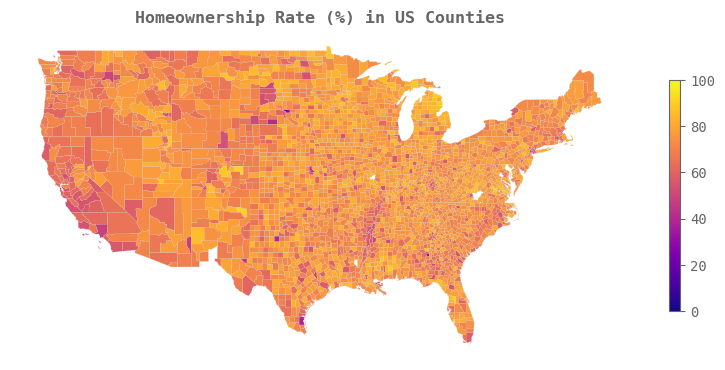

In [71]:
# Map the data for homeownership rate

# Set the variable that will be plotted
variable = 'homeownership'

# Create the figure and axes
fig,ax = plt.subplots()
fig.set_size_inches(10,6)

# Create the map
merged_df.plot(column=variable, cmap='plasma', vmin=0, vmax=100, linewidth=0.1, edgecolor='0.8', ax=ax, 
               legend=True, legend_kwds={"shrink":.5})

ax.axis('off')
ax.set_title('Homeownership Rate (%) in US Counties')

plt.show()

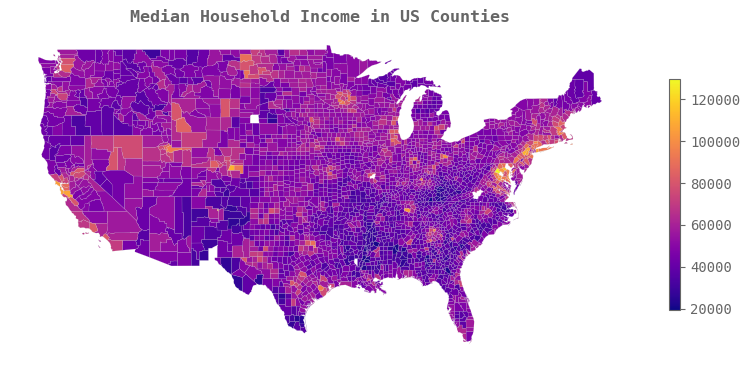

In [72]:
# Map the data for median household income

# Set the variable that will be plotted
variable = 'median_hh_income'

# Create the figure and axes
fig,ax = plt.subplots()
fig.set_size_inches(10,6)

# Create the map
merged_df.plot(column=variable, cmap='plasma', linewidth=0.1, edgecolor='0.8', ax=ax, 
               legend=True, legend_kwds={"shrink":.5})

ax.axis('off')
ax.set_title('Median Household Income in US Counties')

plt.show()

### Exercises

1.

What type of an association is apparent between life span and length of gestation?  
There is a positive association  

What type of an association would you expect to see if the axes of the plot were reversed, i.e., if we plotted length of gestation versus life span?  
There would still be a positive association  

Are life span and length of gestation independent? Explain your reasoning.  
It appears that they are not independent because of one variable appears to be affecting the other  


2.

Chart one is positive linear, chart two shows no association, chart three is positive non-linear, and chart four is negative linear

3.

This would be an exponentially increasing curve, up and to the right.

4.

This would be an upside down U shaped curve if stress is on the x axis and productivity on the y.

5.

Does the new student’s score increase or decrease the average score?  
decrease

What is the new average?  
Have to using weighting to figure this out. 24/25\*74 + 1/25\*64 = 73.6

Does the new student’s score increase or decrease the standard deviation of the scores?  
Not entirely sure on this but I would think that adding an additional score, which would increase the denominator in the standard deviation equation, would have more effect on it than adding another term to the numerator, especially one that is quite close to the mean. So I will say that it will decrease the standard deviation.  
\* I got this wrong, the answer is: The new score is more than 1 standard deviation away from the previous mean, so increase.

6.

Estimate Q1, the median, and Q3 from the histogram.  
Q1: about 6, median: somewhere around 9, Q3: about 35

Would you expect the mean of this dataset to be smaller or larger than the median? Explain your reasoning.  
The mean would be larger than the median because this graph is heavily right skewed. The high values make the mean much larger than the median.

7.

He should fire the employees that have the least number of days off to raise the average.

8.

A: 3, 5, 6, 7, 9; B: 3, 5, 6, 7, 20  
The median and IQR are the same

A: 3, 5, 6, 7, 9; B: 3, 5, 7, 8, 9  
The median is larger in B (7>6) and the IQR is larger in B (3>2)

A: 1, 2, 3, 4, 5; B: 6, 7, 8, 9, 10  
The median is larger in B, the IQR are the same

A: 0, 10, 50, 60, 100; B: 0, 100, 500, 600, 1000  
The median and the IQR are 10X larger in B

9.

A: 3, 5, 5, 5, 8, 11, 11, 11, 13; B: 3, 5, 5, 5, 8, 11, 11, 11, 20  
The mean would be larger in B due to the max value being bigger. The standard deviation will also be larger in B.

A: -20, 0, 0, 0, 15, 25, 30, 30; B: -40, 0, 0, 0, 15, 25, 30, 30  
The mean would larger in A since the more negative minimum in B will pull down the mean for that distribution. The standard deviation will be larger in B.

A: 0, 2, 4, 6, 8, 10; B: 20, 22, 24, 26, 28, 30  
The mean will be larger in B but the standard deviations will be the same.

A: 100, 200, 300, 400, 500; B: 0, 50, 300, 550, 600  
They sum up to the same amount and have the same number of values so the means will be the same. The standard deviation will be higher for B though.

10.

c matches with 1 and this is a right-skewed distribution  
b matches with 3 and this is a relatively uniform distribution  
a matches with 2 and this is a relatively symmetric, approximately normal distribution

11.

Estimate the median AQI value of this sample.  
about 30

Would you expect the mean AQI value of this sample to be higher or lower than the median? Explain your reasoning.  
Would expect the mean to be higher since this is somewhat right skewed.

Estimate Q1, Q3, and IQR for the distribution.  
Q1: about 18, Q3: about 38, IQR: about 20

Would any of the days in this sample be considered to have an unusually low or high AQI? Explain your reasoning.  
If we use the 1.5 times IQR rule for identifying outliers, then I would not expect to find outliers in this distribution if it shows all the values because the low end outlier fence would be below zero and the high end one would be 68, which seems to include all the high end values too. If my IQR estimation is off somewhat there might be a couple outliers on the high end.

12.

Estimate the median for the 400 observations shown in the histogram and note whether you expect the mean to be higher or lower than the median.  
median: somwhere around 80, expect the mean to be lower

13.

Compare the two plots below. What characteristics of the distribution are apparent in the histogram and not in the box plot? What characteristics are apparent in the box plot but not in the histogram?  
The histogram clearly shows that the distribution is bimodal, whereas the box plot clearly shows the median and IQR.

14.

Facebook data indicate that 50% of Facebook users have 100 or more friends, and that the average friend count of users is 190. What do these findings suggest about the shape of the distribution of number of friends of Facebook users?  
This tells us the distribution is right-skewed with a small number of users having very large numbers of friends.

15.

Number of pets per household.  
mean and standard deviation because people have low numbers of pets in their homes so the distribution is likely to be quite uniform  
\* I got this wrong, answer is: Right skewed, there is a natural boundary at 0 and only a few people have many pets. Center: median, variability: IQR.

Distance to work, i.e., number of miles between work and home.  
median and IQR is likely to be better because it's likely that we will have many who are very close or very far skewing the data and making the mean less representative of the sample  
\* Not quite right, answer is: Right skewed, there is a natural boundary at 0 and only a few people live a very long distance from work. Center: median, variability: IQR.

Heights of adult males.  
mean and standard deviation because the distribution should be close to normal  

Age at death.  
median and IQR is likely to be better because it's likely we will have a number of people who die of accident and disease at an early age, skewing the data and making the mean less representative of the sample

Exam grade on an easy test.  
mean and standard deviation because on an easy test it would be expected that the scores should all be similar  
\* I got this wrong, answer is: Left skewed. Center: median, variability: IQR. This again would be due to a natural boundary, this time at 100.

16.

Housing prices in a country where 25% of the houses cost below 350,000, 50\% of the houses cost below 450,000, 75\% of the houses cost below 1,000,000, and there are a meaningful number of houses that cost more than 6,000,000.  
unsymmetric, right skewed, median and IQR should be used

Housing prices in a country where 25\% of the houses cost below 300,000, 50\% of the houses cost below 600,000, 75\% of the houses cost below 900,000, and very few houses that cost more than 1,200,000.  
symmetric, mean and standard deviation would be best

Number of alcoholic drinks consumed by college students in a given week. Assume that most of these students do not drink since they are under 21 years old, and only a few drink excessively.  
Unsymmetric, right skewed, median and IQR would be best to use because there would be a large number of students at a hard limit of 0 and a number of excessive drinkers on the high end that would pull the mean up significantly higher than the median

Annual salaries of the employees at a Fortune 500 company where only a few high-level executives earn much higher salaries than all the other employees.  
Unsymmetric, right skewed, median and IQR would be best to use because relatively very highly paid top executives would pull the mean up significantly higher than the median

Gestation time in humans where 25\% of the babies are born by 38 weeks of gestation, 50\% of the babies are born by 39 weeks, 75\% of the babies are born by 40 weeks, and the maximum gestation length is 46 weeks.
Symmetric, but with some high and low outliers for both premature and late babies. I would use mean and standard deviation for this because the IQR would not capture the variance of the dataset very well.

17.

College students in a statistics class were asked how many hours of television they watch per week, including online streaming services. This sample yielded an average of 8.28 hours, with a standard deviation of 7.18 hours. Is the distribution of number of hours students watch television weekly symmetric? If not, what shape would you expect this distribution to have? Explain your reasoning.  
I think it would be right skewed because 2 standard deviations would take us far past zero hours which is not possible. This means that there would be a large number of students at or near zero and then some excessive TV watchers at the high end.

18.

The average on a history exam (scored out of 100 points) was 85, with a standard deviation of 15. Is the distribution of the scores on this exam symmetric? If not, what shape would you expect this distribution to have? Explain your reasoning.  
Left skewed because just one standard deviation takes us up to 100 meaning that we have a large number of students at or near 100 and some relatively very low scoring students pulling the mean down.

19.

The midrange of a distribution is defined as the average of the maximum and the minimum of that distribution. Is this statistic robust to outliers and extreme skew? Explain your reasoning.
No because the max or min could be outliers that pull the mean far away from the median.

20.

The first Oscar awards for best actor and best actress were given out in 1929. The histograms below show the age distribution for all best actor and best actress winners from 1929 to 2019. Summary statistics for these distributions are also provided. Compare the distributions of ages of best actor and actress winners.  
The mean age of best actresses is lower and the distribution is right skewed, whereas the mean is higher for best actors and the distribution is more symmetrical.

21.

The final exam scores of twenty introductory statistics students, arranged in ascending order, as follows: 57, 66, 69, 71, 72, 73, 74, 77, 78, 78, 79, 79, 81, 81, 82, 83, 83, 88, 89, 94. Suppose students who score above the 75th percentile on the final exam get an A in the class. How many students will get an A in this class?  
5

22.

Would the mean or the median best represent what we might think of as a typical income for the 42 patrons at this coffee shop? What does this say about the robustness of the two measures?  
Median would best represent the typical income of the customers. Median is much more robust to large outliers than the mean.

Would the standard deviation or the IQR best represent the amount of variability in the incomes of the 42 patrons at this coffee shop? What does this say about the robustness of the two measures?  
In this case the IQR would better represent the typical variability. IQR is much more robust to large outliers than standard deviation.

23.

The statistic x / meadian can be used as a measure of skewness. Suppose we have a distribution where all observations are greater than 0, what is the expected shape of the distribution under the following conditions? Explain your reasoning.
a) This would be symmetrical because the mean and median would be equal  
b) This would be left skewed because the median is larger than the mean  
c) This would be right skewed because the mean is larger than the median

24.

Describe the numerical distribution and comment on whether a log transformation may be advisable for these data.  
This distribution is already quite symmetrical so I would say it does not require a log transformation to see it clearly.

Describe the spatial distribution of commuting times using the map.  
Particularly along the eastern seaboard where there are many large cities the commute times are long. The Bay area and Seattle also stand out as places with long commute times.

25.

Describe the numerical distribution and comment on why we might want to use log-transformed values in analyzing or modeling these data.  
This distribution is heavily right skewed with most of the values close to near zero, so a log transformation can help us to see more clearly what the distribution looks like in the area of the chart where there is a large number of data points near zero.

What features of the distribution of the Hispanic population in US counties are apparent in the map but not in the histogram? What features are apparent in the histogram but not the map?  
In the map it's possible to see where the high concentrations of hispanic population are, in the histogram it's possible to know the number of counties that have certain concentration of hispanic population.

Is one visualization more appropriate or helpful than the other? Explain your reasoning.  
Both visualizations have their advantages and disadvantages. The map clearly shows locations and the histogram shows the counts.

\* My answers for the above are OK, but the book does a better job of explaining:  
(a) The distribution of percentage of population that is Hispanic is extremely right skewed with majority of counties with less than 10% Hispanic residents. However, there are a few counties that have more than 90% Hispanic population. It might be preferable to, in certain analyses, to use the log-transformed values since this distribution is much less skewed. (b) The map reveals that counties with higher proportions of Hispanic residents are clustered along the Southwest border, all of New Mexico, a large swath of Southwest Texas, the bottom two-thirds of California, and in Southern Florida. In the map all counties with more than 40% of Hispanic residents are indicated by the darker shading, so it is impossible to discern how high Hispanic percentages go. The histogram reveals that there are counties with over 90% Hispanic residents. The histogram is also useful for estimating measures of center and spread. (c) Both visualizations are useful, but if we could only examine one, we should examine the map since it explicitly ties geographic data to each county’s percentage.

26.

What features of the distribution are apparent in the histogram and not the box plot? What features are apparent in the box plot but not in the histogram?  
The histogram shows that the distribution is bimodal. The box plot gives us the median and variability (IQR).

What may be the reason for the bimodal distribution? Explain.  
The two modes are likely due to both males and females being including in the same data set.

Compare the distribution of marathon times for men and women based on the box plot shown below.  
The womens times are higher than the mens and appear to be mostly symmetrical but with some relatively high outlying values. The distribution for the mean appears to be somewhat right skewed because the median is to the left of center in the IQR box. This means that many of the men's times are clustered close to a limit of how fast a marathon can be run.

The time series plot shown below is another way to look at these data. Describe what is visible in this plot but not in the others.  
This plot shows how winning times have changed over the years. It's interesting that there was a big drop in times in the late seventies, perhaps attributable to some kind of advance in marathon running technique.